# Sampling Variability
#### Different samples from same population can have different values of the same measurement

#### sampling variability basically means how much a single sample value can deviate from the mean of all the collected sample data

- Sampling variability refers to the variability that exists between different samples that are drawn from the same population.
- It is the degree to which the characteristics of a sample can change depending on the specific individuals that are selected to be included in the sample.
- Sampling variability can be influenced by factors such as sample size, sampling method, and the distribution of the population being sampled.
- In statistical analysis, it is important to account for sampling variability in order to accurately estimate population parameters and make valid inferences about the population.

# Implication of Sampling Variablity
#### A single measurement may be an unreliable estimate of a population parameter
- Sample variability refers to the differences or fluctuations observed in a sample of data from a larger population. The implications of sample variability include:

    - Uncertainty: The presence of variability in sample data leads to uncertainty in the results, making it difficult to draw accurate conclusions about the entire population.
    <br />

    - Bias: If the sample is not selected randomly and representatively, it can introduce bias into the results, affecting the accuracy and reliability of the findings.
    <br />

    - Confidence Intervals: The variability in the sample data affects the size of the confidence intervals, which represents the level of uncertainty in the results.
    <br />

    - Statistical Inference: The variability in sample data influences the statistical methods and techniques used to make inferences about the population.
    <br />

    - Generalization: It is important to consider the sample variability when generalizing the results of a study to the larger population, as it affects the validity and reliability of the conclusions.

# Sources of Sapling Variablility
- Natural Variation: Often seen in biology (eg height, weight) and physics (earthquake magnitute)
- Sampling error: This is the difference between a sample estimate and the true population value.

- Sample size: The larger the sample size, the smaller the sampling error.

- Sample selection: The sample selected for analysis can impact the results. For example, if the sample is not representative of the population, the results may not be accurate.

- Nonresponse: If a significant portion of the sample does not respond to a survey or questionnaire, this can impact the results.

- Measurement error: If the measurement instrument used to collect data is not accurate, this can contribute to sampling variability.

- Random variation: Random fluctuations in the data can contribute to sampling variability.

- Data preparation: The way data is processed, such as by coding or cleaning, can impact the results.

- Complex Systems: Measuring some factors while ignoring others (eg: measuring height while ignoring age etc)

In [ ]:
|import matplotlib.pyplot as plt
import torch
import numpy as np

# What to do with Sample Variability

#### Take many samples! averaging together many samples will approximate to the true population mean (Law of Large Numbers)

Increase sample size: Increasing the sample size can reduce the sampling error, making the sample estimate more reliable.

Use a random sample: Selecting a random sample from the population can ensure that the sample is representative of the population.

Reduce nonresponse: To reduce the impact of nonresponse, efforts can be made to increase response rates, such as by using incentives or follow-up calls.

Improve measurement instruments: Ensuring that the measurement instruments used to collect data are accurate and reliable can reduce the impact of measurement error.

Use appropriate statistical techniques: Choosing appropriate statistical techniques to analyze the data, such as regression analysis or bootstrapping, can help to account for sampling variability.

Replicate the study: Replicating the study with a different sample can help to verify the results and reduce the impact of random variation.

Use a larger set of data: If possible, using a larger set of data can help to reduce the impact of sampling variability.
<br />

# Is sample Variability good for DL?

Positive impact:

- Increased diversity: Sampling variability can increase the diversity of the training data, which can help to improve the generalizability of the model.

- Improved robustness: By exposing the model to different variations of the data, sampling variability can help to improve the robustness of the model and reduce
 overfitting.

        - Robustness in Deep Learning (DL) refers to the ability of a model to continue to perform well on unseen data, even in the presence of small variations or anomalies in the input data.
         - A robust model is one that is able to generalize well to new data and is not overly sensitive to small changes in the input data.

        - A robust DL model is desirable because it reduces the risk of overfitting, which occurs when a model is too closely fit to the training data and is unable to generalize to new data.
         - Robust models are also better able to handle data that is noisy or contains outliers, which can negatively impact the performance of less robust models.

Negative impact:

- Increased noise: Sampling variability can also increase the noise in the training data, which can negatively impact the model's performance and increase the risk of overfitting.

- Unbalanced data: If the sample is not representative of the population, it can lead to unbalanced data and negatively impact the model's performance.

#### It is important to carefully consider the trade-off between diversity and noise when designing a DL model.


In [ ]:
# create a list of random numbers to compute the mean and variance of

a=np.random.randint(1,40,20)
print(a)
n=len(a) # will be equal to 20 as defined above

#   compute the population mean
popmean=np.mean(a)

#   compute a sample mean
sample = np.random.choice(a,size=5,replace=True)
# we picked any 5 elements from our population to make a sample
samplemean=np.mean(sample)

# print them
print(popmean)
print(samplemean)

[16 22 29 36 31 14 36 31 10 13  7 23 24  4 29  2  6 21  8 27]
19.45
17.6


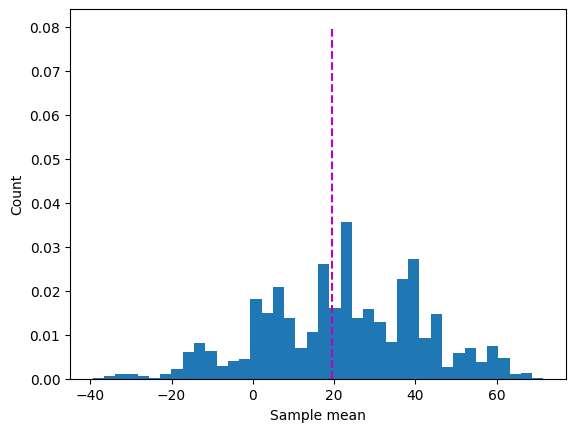

In [ ]:
# compute lots of sample means

x = np.random.normal(10, 50, 5)

# number of experiments to run
nExpers = 100000

# run the experiment

sampleMeans=np.zeros(nExpers)
for i in range(nExpers):

    #step1
    sample = np.random.choice(x,size=5,replace=True)

    #step2: compute its mean
    sampleMeans[i]=np.mean(sample)

# show the results as a histogram
plt.hist(sampleMeans, bins=40, density=True)
plt.plot([popmean, popmean],[0,.08],'m--')
plt.ylabel('Count')
plt.xlabel('Sample mean')
plt.show()

## Cross Entropy

In [ ]:
#   Note: all probabilities must sum to 1 in a sample space

p=[1,0] # sum=1
q=[.25,.75] # sum=1

H=0
for i in range(len(p)):
    H-=p[i]*np.log(q[i])

print('Cross entropy: '+str(H))

Cross entropy: 1.3862943611198906


In [ ]:
# also correct, written out for N=2 events
H-=(p[0]*np.log(q[0])+p[1]*np.log(q[1]))

print('Correct entropy: '+str(H))

#   simplification
H=-np.log(q[0])
print('Manually simplified ')

## Differences in Entropy and Variance
- Entropy is non-linear and makes no assumption about the distribution
- Variance depends on the validity of the mean therefore is appropriate for roughly normal data.

In [ ]:
# now using pytorch
import torch
import torch.nn.functional as func

In [ ]:
q_tensor=torch.Tensor(q)
p_tensor=torch.Tensor(p)


#  This function is sensitive to order of the inputs and doesn't work with numpy so well, so we have to define p and q as tensors and can't use the numpy array p and q directly

func.binary_cross_entropy(q_tensor, p_tensor)

tensor(1.3863)

/var/folders/5k/k70qf4916qg33hlh5mv8hkxc0000gn/T/ipykernel_47987/58059951.py:4: RuntimeWarning: divide by zero encountered in log2
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)
/var/folders/5k/k70qf4916qg33hlh5mv8hkxc0000gn/T/ipykernel_47987/58059951.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)


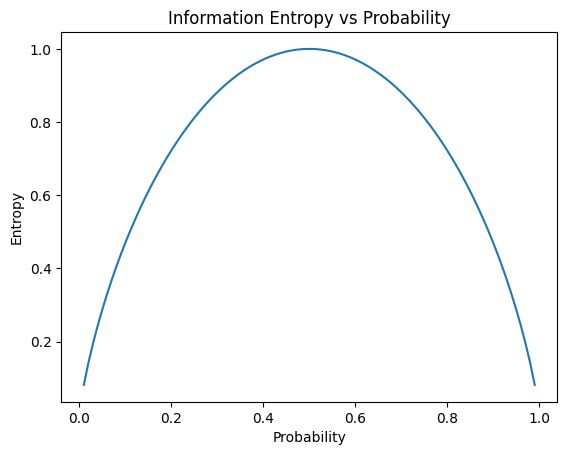

In [ ]:
# Let's plot how the entropy is distributed with respect to probability

def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

probabilities = np.linspace(0, 1, num=100) # has values from 0 to 1, with 100 equal intervals
entropies = [entropy(p) for p in probabilities]

plt.plot(probabilities, entropies)
plt.xlabel("Probability")
plt.ylabel("Entropy")
plt.title("Information Entropy vs Probability")
plt.show()
